# Left-Right symmetric model Lagrangian

In [1]:
from sympy import symbols, init_printing, Matrix, I, Add, eye, sqrt, conjugate, trace, factor, simplify
from sympy.physics import msigma 
init_printing()

## Scalars

### Triplets

In [2]:
deltaLp, deltaLpp = symbols(r'\delta_L^+, \delta_L^{++}')
deltaRp, deltaRpp = symbols(r'\delta_R^+, \delta_R^{++}')

deltaLm, deltaLmm = symbols(r'\delta_L^-, \delta_L^{--}')
deltaRm, deltaRmm = symbols(r'\delta_R^-, \delta_R^{--}')

deltaL0 = symbols(r'\delta_L^0')
deltaR0 = symbols(r'\delta_R^0') ####### debe de ser complejo por que tiene un vev complejo

In [3]:
sqrt2 = sqrt(2)
DeltaL = Matrix(
    [
        [deltaLp/sqrt2, deltaLpp],
        [deltaL0, -deltaLp/sqrt2]
    ]
)
DeltaR = Matrix(
    [
        [deltaRp/sqrt2, deltaRpp],
        [deltaR0, -deltaRp/sqrt2]
    ]
)

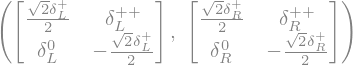

In [4]:
DeltaL, DeltaR

In [5]:
from sympy import sin, cos

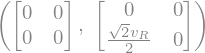

In [6]:
vL, vR, theta = symbols(r'v_L, v_R, \theta', positive=True)
vevL = {deltaL0:0, deltaLp:0, deltaLpp:0}
vevR = {deltaR0:vR/sqrt2, deltaRp:0, deltaRpp:0}
DeltaL.subs(vevL), DeltaR.subs(vevR)

In [7]:
conjugate_fields = {
    conjugate(deltaLp):deltaLm,
    conjugate(deltaLm):deltaLp,
    conjugate(deltaLpp):deltaLmm,
    conjugate(deltaLmm):deltaLpp,
    conjugate(deltaRm):deltaRp,
    conjugate(deltaRp):deltaRm,
    conjugate(deltaRmm):deltaRpp,
    conjugate(deltaRpp):deltaRmm,
    #conjugate(WLp):WLm,
    #conjugate(WLm):WLp,
    #conjugate(WRm):WRp,
    #conjugate(WRp):WRm
}

### Bidoublet

In [8]:
phi1p, phi1m = symbols(r'\phi_1^+, \phi_1^-')
phi2p, phi2m = symbols(r'\phi_2^+, \phi_2^-')

phi10, phi20 = symbols(r'\phi_1^0, \phi_2^0')

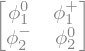

In [9]:
Phi = Matrix(
    [
        [phi10, phi1p],
        [phi2m, phi20]
    ]
)
Phi

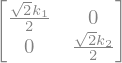

In [10]:
k1, k2 = symbols(r"k_1, k_2", positive=True)
vevPhi = {phi10:k1/sqrt2, phi20:k2/sqrt2, phi1p:0, phi2m:0, phi2p:0, phi1m:0}
Phi.subs(vevPhi)

## Scalar potential and Higgs mass spectrum

In [11]:
from sympy.physics.quantum import Dagger
from sympy import solve

In [12]:
conjugate_scalarsPhi = {
    conjugate(phi1p):phi1m,
    conjugate(phi2p):phi2m,
    conjugate(phi1m):phi1p,
    conjugate(phi2m):phi2p
}

In [13]:
# PhiPhitildeDagger, PhitildeDaggerPhi

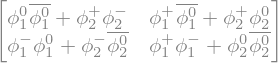

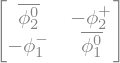

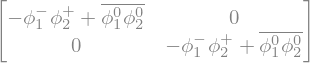

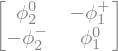

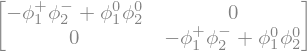

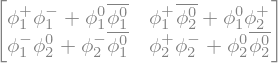

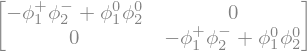

In [14]:
PhiDagger = Dagger(Phi).subs(conjugate_scalarsPhi)
#PhiDagger
PhiDaggerPhi = PhiDagger*Phi
display(PhiDaggerPhi)
Phitilde = (msigma(2)*conjugate(Phi)*msigma(2)).subs(conjugate_scalarsPhi)
#Phitilde
display(Phitilde)
PhitildePhiDagger = Phitilde*PhiDagger
display(PhitildePhiDagger)
PhitildeDagger = Dagger(Phitilde).subs(conjugate_scalarsPhi)
#PhitildeDagger
display(PhitildeDagger)
PhitildeDaggerPhi = PhitildeDagger*Phi
display(PhitildeDaggerPhi)
PhiPhiDagger = Phi*PhiDagger
display(PhiPhiDagger)
PhiPhitildeDagger = Phi*PhitildeDagger
display(PhiPhitildeDagger)

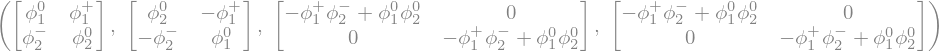

In [15]:
Phi, PhitildeDagger, Phi*PhitildeDagger, PhitildeDagger*Phi

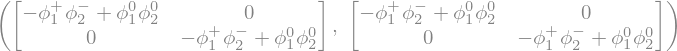

In [16]:
PhiPhitildeDagger, PhitildeDaggerPhi

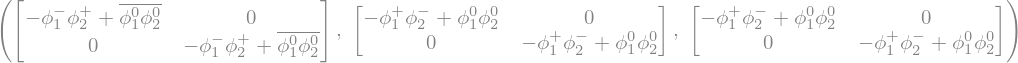

In [17]:
Phitilde*PhiDagger, Dagger(Phitilde*PhiDagger).subs(conjugate_scalarsPhi), Phi*PhitildeDagger

In [18]:
conjugate_scalars_deltaL = {
    conjugate(deltaLp):deltaLm,
    conjugate(deltaLm):deltaLp,
    conjugate(deltaLpp):deltaLmm,
    conjugate(deltaLmm):deltaLpp
}

conjugate_scalars_deltaR = {
    conjugate(deltaRp):deltaRm,
    conjugate(deltaRm):deltaRp,
    conjugate(deltaRpp):deltaRmm,
    conjugate(deltaRmm):deltaRpp
}

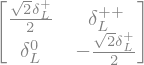

In [19]:
DeltaL

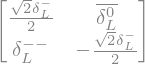

In [20]:
DeltaLDagger = Dagger(DeltaL).subs(conjugate_scalars_deltaL)
DeltaLDagger

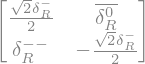

In [21]:
DeltaRDagger = Dagger(DeltaR).subs(conjugate_scalars_deltaR)
DeltaRDagger

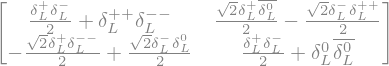

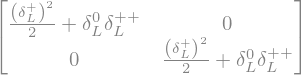

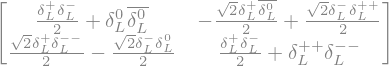

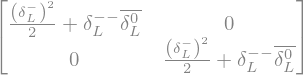

In [22]:
DeltaLDeltaLDagger = DeltaL*DeltaLDagger
display(DeltaLDeltaLDagger)
DeltaLDeltaL = DeltaL*DeltaL
display(DeltaLDeltaL)
DeltaLDaggerDeltaL = DeltaLDagger*DeltaL
display(DeltaLDaggerDeltaL)
DeltaLDaggerDeltaLDagger = DeltaLDagger*DeltaLDagger
display(DeltaLDaggerDeltaLDagger)

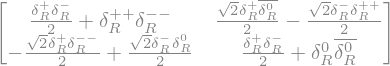

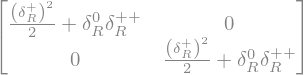

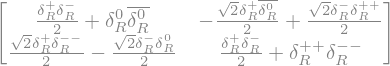

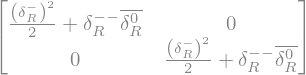

In [23]:
DeltaRDeltaRDagger = DeltaR*DeltaRDagger
display(DeltaRDeltaRDagger)
DeltaRDeltaR = DeltaR*DeltaR
display(DeltaRDeltaR)
DeltaRDaggerDeltaR = DeltaRDagger*DeltaR
display(DeltaRDaggerDeltaR)
DeltaRDaggerDeltaRDagger = DeltaRDagger*DeltaRDagger
display(DeltaRDaggerDeltaRDagger)

### Higgs potential

In [24]:
mu12, mu22, mu32 = symbols(r'\mu_1^2, \mu_2^2, \mu_3^2', real=True)
lamb1, lamb2, lamb3, lamb4 = symbols(r'\lambda_1, \lambda_2, \lambda_3, \lambda_4', real=True)
rho1, rho2, rho3, rho4 = symbols(r'\rho_1, \rho_2, \rho_3, \rho_4', real=True)
alpha1, alpha2, alpha3 = symbols(r'\alpha_1, \alpha_2, \alpha_3', real=True)
beta1, beta2, beta3 = symbols(r'beta_1, beta_2, beta_3', real=True)

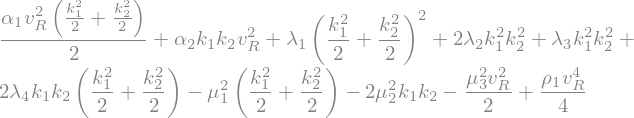

In [25]:
VLRPhi = (
    # Vphi
    -mu12*trace(PhiDaggerPhi)
    - mu22*(trace(Phitilde*PhiDagger) + trace(PhitildeDagger*Phi))
    #
    + lamb1*(trace(PhiPhiDagger))**2
    + lamb2*(trace(PhitildePhiDagger)**2 + trace(PhitildeDaggerPhi)**2)
    + lamb3*trace(PhitildePhiDagger)*trace(PhitildeDaggerPhi)
    + lamb4*trace(PhiDaggerPhi)*(trace(PhitildePhiDagger) + trace(PhitildeDaggerPhi))
    # Vtriplet
    -mu32*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + rho1*(trace(DeltaLDeltaLDagger)**2 + trace(DeltaRDeltaRDagger)**2)
    + rho2*(trace(DeltaLDeltaL)*trace(DeltaLDaggerDeltaLDagger) + trace(DeltaRDeltaR)*trace(DeltaRDaggerDeltaRDagger))
    + rho3*trace(DeltaLDeltaLDagger)*trace(DeltaRDeltaRDagger)
    + rho4*(trace(DeltaLDeltaL)*trace(DeltaRDaggerDeltaRDagger) + trace(DeltaLDaggerDeltaLDagger)*trace(DeltaRDeltaR))
    # Vdoubletriplet
    + alpha1*trace(PhiDaggerPhi)*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + alpha2*(
        trace(PhitildeDaggerPhi)*trace(DeltaRDeltaRDagger) + trace(PhiPhitildeDagger)*trace(DeltaLDeltaLDagger) + 
        trace(PhitildePhiDagger)*trace(DeltaRDeltaRDagger) + trace(PhitildePhiDagger)*trace(DeltaLDeltaLDagger) # this term is different to Barenboim1996, because there is an error in the hermitian conjugate  the proportional terms to DeltaLDeltaLDagger
    )
    # + alpha3*(trace(PhiPhiDagger*DeltaLDeltaLDagger) + trace(PhiDaggerPhi*DeltaRDeltaRDagger))
    + beta1*(trace(Phi*DeltaR*PhiDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phi*DeltaRDagger))
    + beta2*(trace(Phitilde*DeltaR*PhiDagger*DeltaLDagger) + trace(PhitildeDagger*DeltaL*Phi*DeltaRDagger))
    # beta3 = beta2 in this case
    + beta2*(trace(Phi*DeltaR*PhitildeDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phitilde*DeltaRDagger))
)
VLRPhi.subs(vevL).subs(vevR).subs(vevPhi)

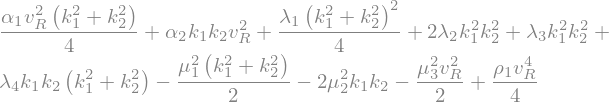

In [26]:
VLRPhi_vev = VLRPhi.subs(vevL).subs(vevR).subs(vevPhi).simplify()#.collect([mu12, mu22, mu32, lamb2, rho1, beta2], factor)#.subs(k1ri)
VLRPhi_vev

In [27]:
scalar_vevs = [k1, k2, vR]
tadpoles_relations = {}
for vev in scalar_vevs:
    tadpoles_relations[vev] = VLRPhi_vev.diff(vev).expand().collect(
    [alpha1, alpha2, lamb1, lamb2, lamb3, lamb4, beta1, beta2], factor)

In [28]:
from sympy import Symbol

## Caso $k_2=k_1$

In [29]:
from sympy import trigsimp

In [31]:
tadpoles_relations_caso1 = {}
for vev in tadpoles_relations:
    tadpoles_relations_caso1[vev] = tadpoles_relations[vev]#.subs(k2, k1)

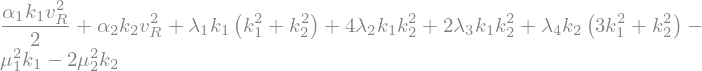

In [32]:
tadpole1_caso1 = tadpoles_relations_caso1[k1].trigsimp()
tadpole1_caso1

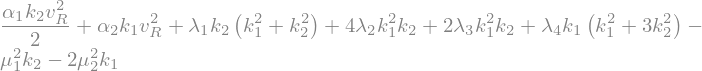

In [33]:
tadpole2_caso1 = tadpoles_relations_caso1[k2].trigsimp()
tadpole2_caso1

In [34]:
tadpole12_sol_caso1 = solve([tadpole1_caso1, tadpole2_caso1], [mu12, mu22], dict=True)[0]

In [35]:
for vev in tadpole12_sol_caso1:
    tadpole12_sol_caso1[vev] = tadpole12_sol_caso1[vev].collect([k1, alpha1, alpha2],  trigsimp)

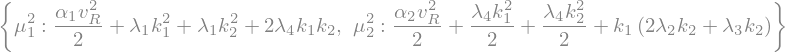

In [36]:
tadpole12_sol_caso1

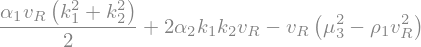

In [37]:
tadpole3_caso1 = tadpoles_relations_caso1[vR].trigsimp()
tadpole3_caso1

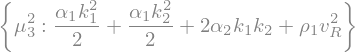

In [38]:
mu32_sol = solve([tadpole3_caso1], [mu32], dict=True)[0]
mu32_sol

## Mass matrices

Expand neutral fields in terms of real and imaginary parts
$$F = \frac{1}{\sqrt{2}}(F^r + i F^i)$$

In [39]:
phi10r, phi10i = symbols(r'\phi_1^{0r}, \phi_1^{0i}', real=True)
phi20r, phi20i = symbols(r'\phi_2^{0r}, \phi_2^{0i}', real=True)
deltaR0r, deltaR0i = symbols(r'\delta_R^{0r}, \delta_R^{0i}', real=True)
deltaL0r, deltaL0i = symbols(r'\delta_L^{0r}, \delta_L^{0i}', real=True)
complex_scalar_fields = {
    phi10: (phi10r + I*phi10i)/sqrt2,
    phi20: (phi20r + I*phi20i)/sqrt2,
    deltaR0: (deltaR0r + I*deltaR0i)/sqrt2,
    deltaL0: (deltaL0r + I*deltaL0i)/sqrt2
}

In [40]:
VLRPhi_ri = VLRPhi.subs(complex_scalar_fields)

# Scalar ms

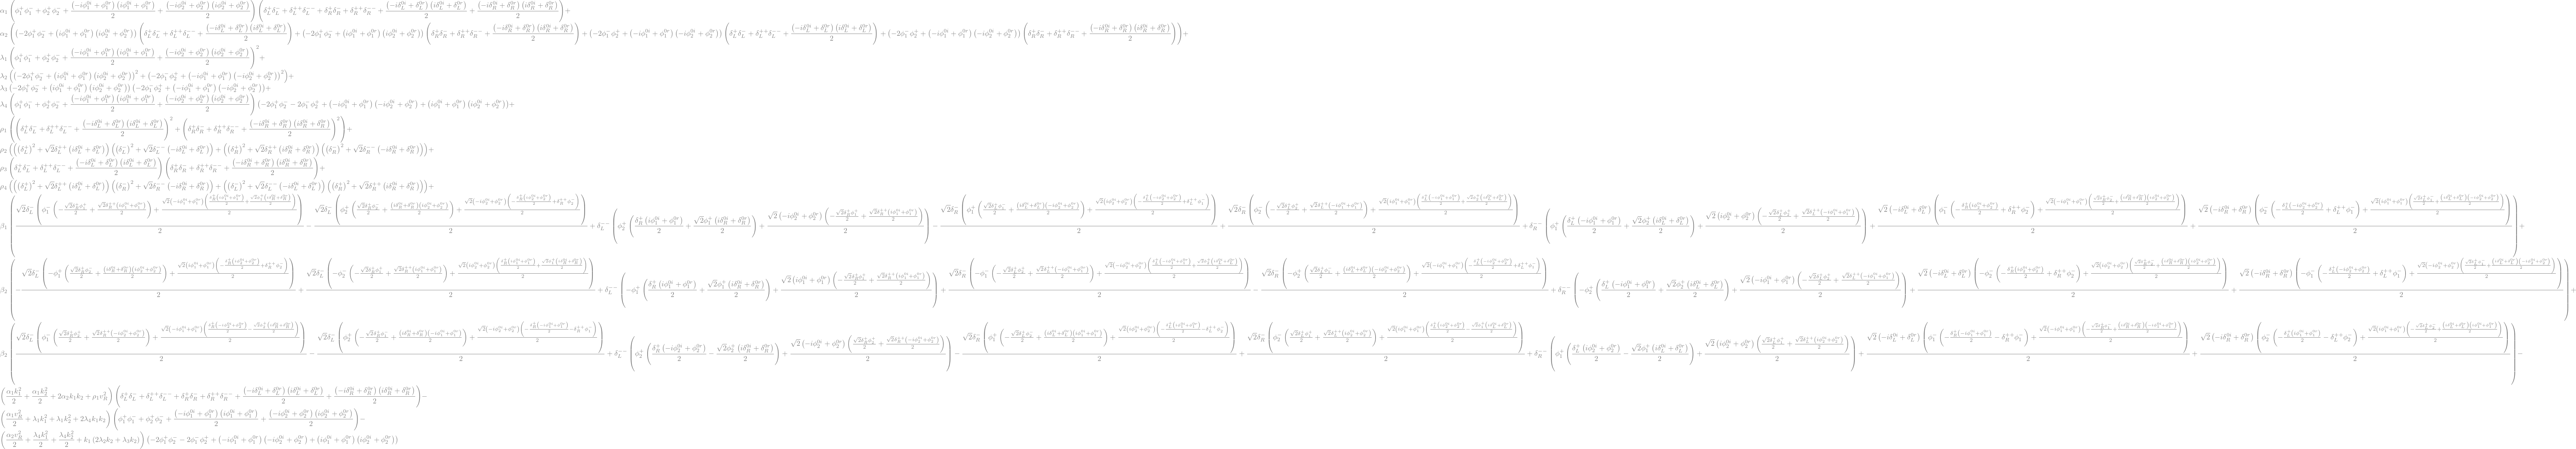

In [41]:
VLRPhi_ri_tadpole_caso1 = VLRPhi_ri.subs(tadpole12_sol_caso1).subs(mu32_sol)
VLRPhi_ri_tadpole_caso1

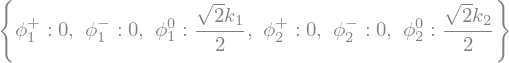

In [42]:
vevPhi

In [43]:
vevPhi[phi10r] = vevPhi[phi10]
vevPhi[phi10i] = 0
vevPhi[phi20r] = vevPhi[phi20]
vevPhi[phi20i] = 0

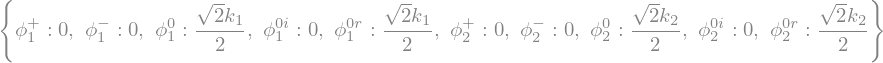

In [44]:
vevPhi

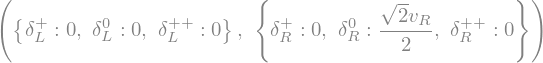

In [45]:
vevL,vevR

In [46]:
vevL[deltaL0r] = 0
vevL[deltaL0i] = 0
vevR[deltaR0r] = vevR[deltaR0]
vevR[deltaR0i] = 0

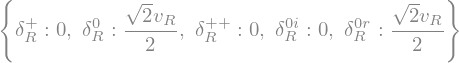

In [47]:
vevR

In [48]:
from sympy import derive_by_array

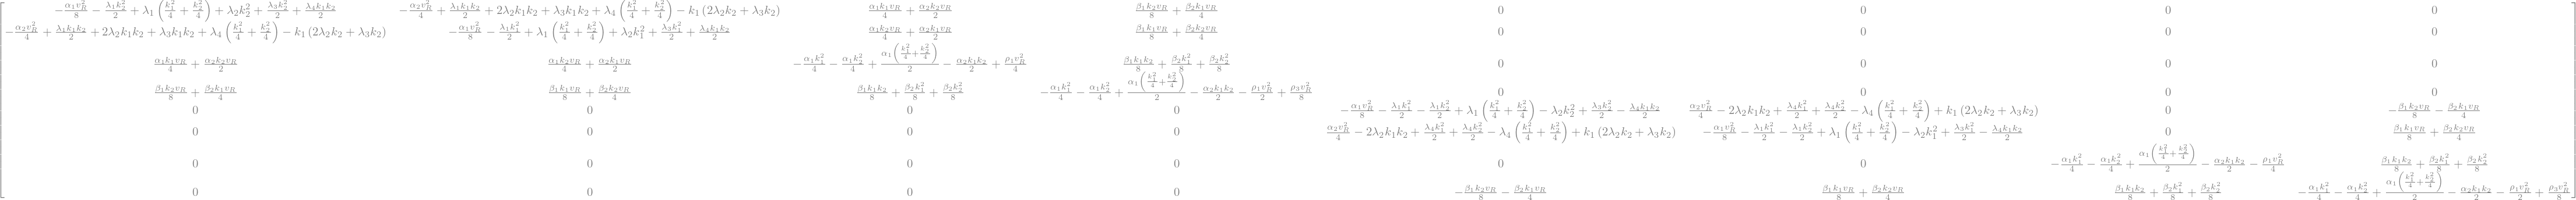

In [49]:
phir_fields = [phi10r, phi20r, deltaR0r, deltaL0r]
phii_fields = [phi10i, phi20i, deltaR0i, deltaL0i]
phiri_fields = phir_fields + phii_fields
MRI_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole_caso1, phiri_fields), phiri_fields)/2).subs(
    vevPhi
).subs(vevL).subs(vevR)#.subs(k2, k1)
MRI_square

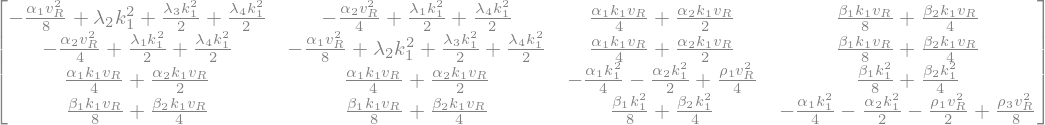

In [50]:
Mrr = MRI_square[0:4, 0:4].applyfunc(lambda x: x.expand().trigsimp()).subs(k2, k1)
Mrr

In [51]:
from sympy import Poly
def large_term_propto_(exp, vR):

    # Convert the expression to a polynomial and find the highest degree term
    poly = Poly(exp, vR)
    highest_term = poly.LC() * vR**poly.degree()

    return highest_term


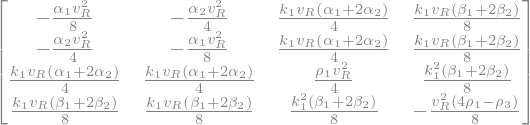

In [52]:
Mrr_vR = Mrr.tomatrix().applyfunc(lambda x: large_term_propto_(x, vR).factor())
Mrr_vR

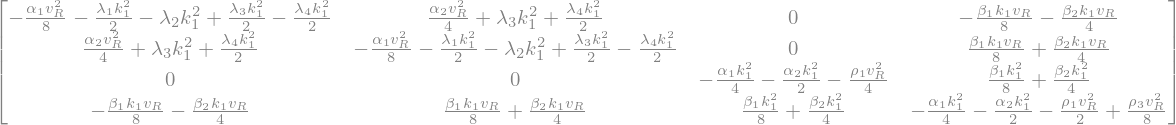

In [53]:
Mii = MRI_square[4:8, 4:8].applyfunc(lambda x: x.expand().trigsimp()).subs(k2, k1)
Mii

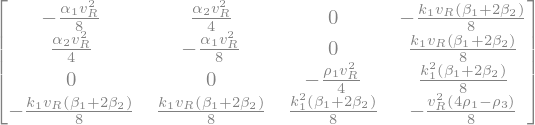

In [54]:
Mii_vR = Mii.tomatrix().applyfunc(lambda x: large_term_propto_(x, vR).factor())
Mii_vR

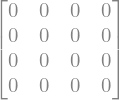

In [55]:
Mri = MRI_square[0:4, 4:8]
Mri

In [56]:
vevL[deltaLmm] = 0
vevL[deltaRmm] = 0
vevL[deltaLm] = 0
vevL[deltaRm] = 0

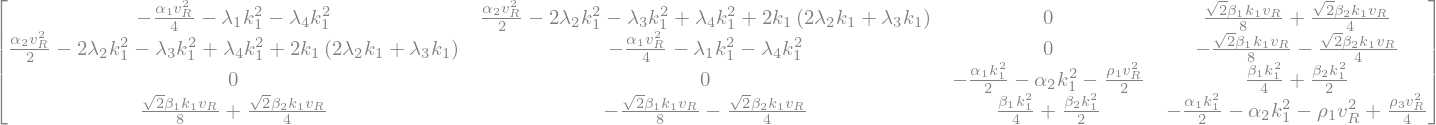

In [57]:
phip_fields = [phi1p, phi2p, deltaRp, deltaLp]
phim_fields = [phi1m, phi2m, deltaRm, deltaLm]
Mp_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole_caso1, phim_fields), phip_fields)).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(k2, k1)
Mp_square

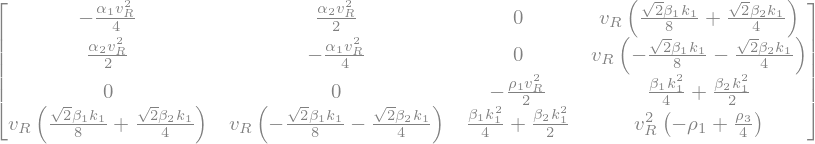

In [58]:
Mp_vR = Mp_square.tomatrix().applyfunc(lambda x: large_term_propto_(x, vR))
Mp_vR

In [59]:
def build_mass_matrix(potential, fields1, fields2):
    """
    Build the mass matrix for a given potential and fields.
    """
    # Initialize the mass matrix
    Matrix_elements = derive_by_array(derive_by_array(potential, fields1), fields2)

    return Matrix_elements.tomatrix()

# Calculating the mass matrices of the scalars

The following two functions allows us calculate the mass matrices

In [60]:
def charpoly_coeffs_approximatevR(M, simplification= lambda x:x):
    """
    Approximate the coefficients of the characteristic polynomial of a matrix M
    keeping only the terms with large degree on vR
    """
    charpoly = M.charpoly()
    coeffs = charpoly.coeffs()
    for i in range(len(coeffs)):
        coeffs[i] = simplification(large_term_propto_(coeffs[i], vR))
    return coeffs

def construct_poly(coeffs_list, x):
    """
    Construct a polynomial from a list of coefficients
    """
    poly = 0
    power = len(coeffs_list)
    for i in range(power):
        poly += coeffs_list[i] * x**(power-1 - i)
    return poly

## Mass doubly charged scalars

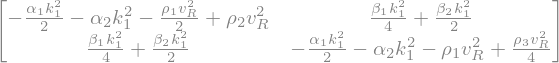

In [61]:
phipp_fields = [deltaRpp, deltaLpp]
phippc_fields = [deltaRmm, deltaLmm]
Mpp_square = (build_mass_matrix(VLRPhi_ri_tadpole_caso1, fields1=phippc_fields, fields2=phipp_fields)).subs(
    vevPhi
).subs(vevPhi).subs(vevL).subs(vevR).subs(k2, k1)
Mpp_square

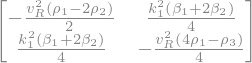

In [62]:
Mpp_vR = Mpp_square.applyfunc(lambda x: large_term_propto_(x, vR).factor())
Mpp_vR

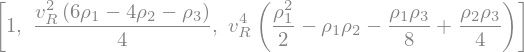

In [63]:
Mpp_charpoly_coeffs = charpoly_coeffs_approximatevR(Mpp_vR, simplify)
Mpp_charpoly_coeffs

In [64]:
x = symbols('x')

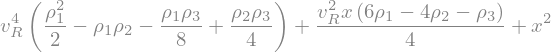

In [65]:
termpp = construct_poly(Mpp_charpoly_coeffs, x)
termpp

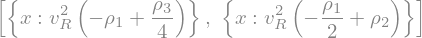

In [66]:
mpp_sol =  solve(termpp, x, dict=True)
mpp_sol

In [67]:
mH1pp = symbols('m_{H_1^{++}}', positive=True)
mH2pp = symbols('m_{H_2^{++}}', positive=True)

In [68]:
from sympy import Eq

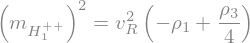

In [69]:
eq1 = Eq(mH1pp**2, mpp_sol[0][x])
eq1

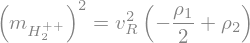

In [70]:
eq2 = Eq(mH2pp**2, mpp_sol[1][x])
eq2

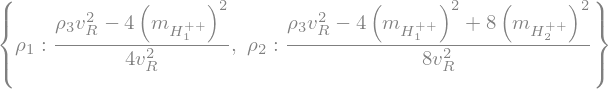

In [71]:
rho12_sol = solve([eq1, eq2], [rho1, rho2], dict=True)[0]
rho12_sol

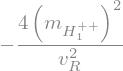

In [72]:
(4*rho1 - rho3).subs(rho12_sol).simplify()

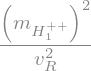

In [73]:
(-rho1 + rho3/4).subs(rho12_sol).simplify()

## Mass singly charged scalars

In [74]:
Mp_charpoly_coeffs = charpoly_coeffs_approximatevR(Mp_vR, lambda x: x.subs(rho12_sol).simplify())

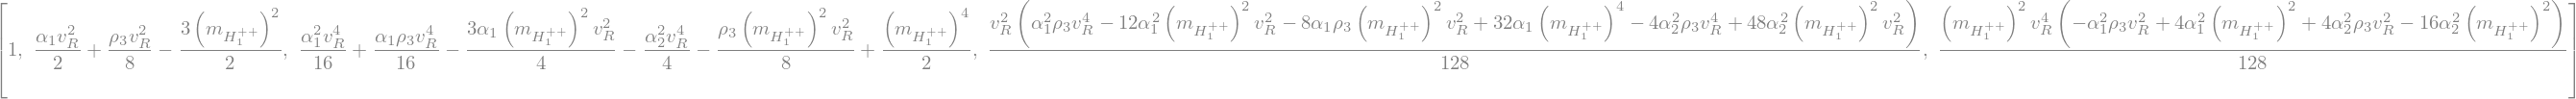

In [75]:
Mp_charpoly_coeffs

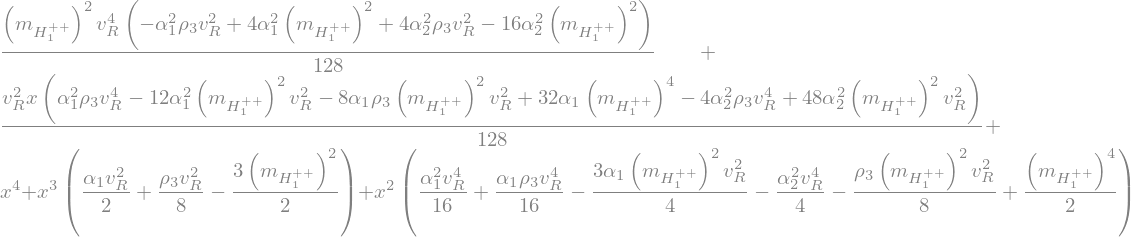

In [76]:
termp = construct_poly(Mp_charpoly_coeffs, x)
termp

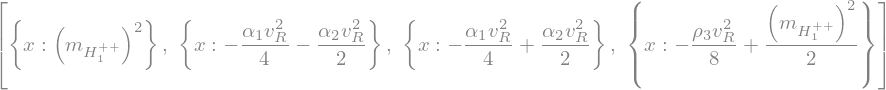

In [77]:
mp_sol = solve(termp,x, dict=True)
mp_sol

In [78]:
mH1p, mH2p, mH3p, mH4p = symbols('m_{H_1^+}, m_{H_2^+}, m_{H_3^+}, m_{H_4^+}', positive=True)

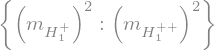

In [79]:
mH1p_sol = {mH1p**2: mp_sol[0][x]}
mH1p_sol

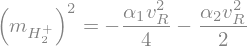

In [80]:
eq2p = Eq(mH2p**2, mp_sol[1][x])
eq2p

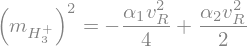

In [81]:
eq3p = Eq(mH3p**2, mp_sol[2][x])
eq3p

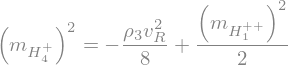

In [82]:
eq4p = Eq(mH4p**2, mp_sol[3][x])
eq4p

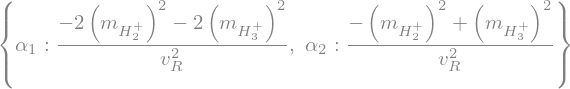

In [83]:
alpha12_sol = solve([eq2p, eq3p], [alpha1, alpha2], dict=True)[0]
alpha12_sol

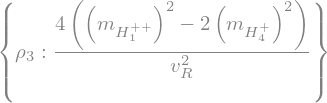

In [84]:
rho3_sol = solve(eq4p, rho3, dict=True)[0]
rho3_sol

## Mass neutral scalars

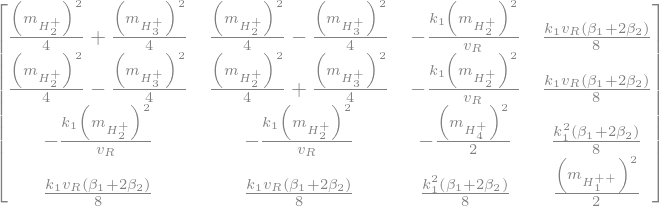

In [85]:
Mrr_vR.subs(rho12_sol).subs(rho3_sol).subs(alpha12_sol).applyfunc(simplify)

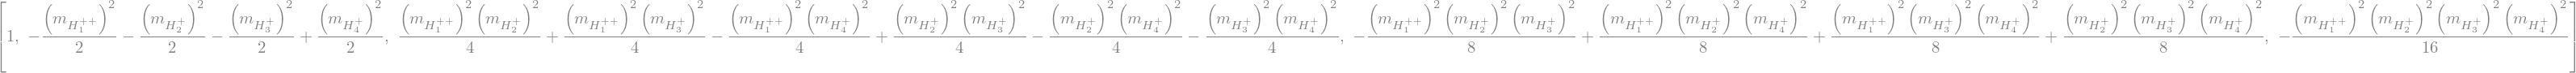

In [86]:
Mrr_charpoly_coeffs = charpoly_coeffs_approximatevR(Mrr_vR, simplification= lambda x:x.subs(rho12_sol).subs(rho3_sol).subs(alpha12_sol).simplify())
Mrr_charpoly_coeffs

In [87]:
termrr = construct_poly(Mrr_charpoly_coeffs, x)

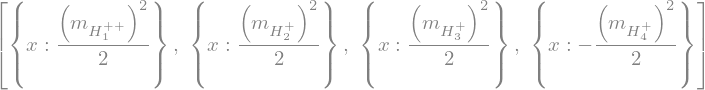

In [88]:
mrr_sol = solve(termrr, x, dict=True)
mrr_sol

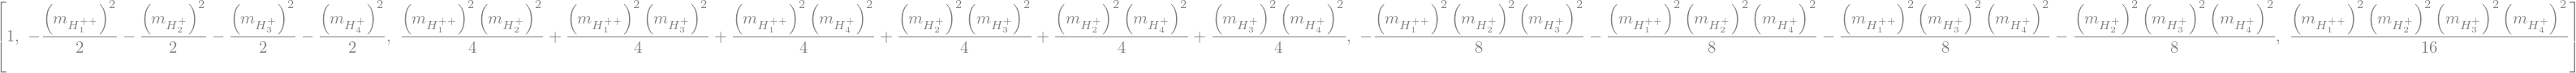

In [89]:
Mii_charpoly_coeffs = charpoly_coeffs_approximatevR(Mii_vR, simplification= lambda x:x.subs(rho12_sol).subs(rho3_sol).subs(alpha12_sol).simplify())
Mii_charpoly_coeffs

In [90]:
termii = construct_poly(Mii_charpoly_coeffs, x)

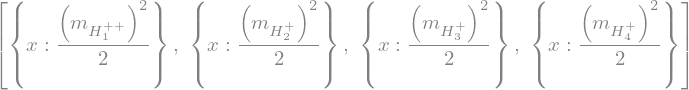

In [91]:
mii_sol = solve(termii, x, dict=True)
mii_sol

# Yukawa charged lepton sector

In [418]:
from sympy import IndexedBase, Idx

In [419]:
#Indexed?

In [420]:
i,j = symbols('i, j', cls=Idx)
#h = IndexedBase('h')
#ht = IndexedBase(r'\tilde{h}')
hij = symbols('h_{ij}')
htij = symbols(r'\tilde{h}_{ij}')

In [421]:
#ht[i, j]

In [422]:
nueL, numuL, nutauL = symbols(r'{{\nu_{L}}}_e, {{\nu_{L}}}_\mu, {{\nu_{L}}}_\tau')
nueR, numuR, nutauR = symbols(r'{{\nu_{R}}}_e, {{\nu_{R}}}_\mu, {{\nu_{R}}}_\tau')
nuL = IndexedBase(r'{{\nu_{L}}}')
nuR = IndexedBase(r'{{\nu_{R}}}')
eL, muL, tauL = symbols(r'e_L, \mu_L, \tau_L')
eR, muR, tauR = symbols(r'e_R, \mu_R, \tau_R')
lL = IndexedBase('{{l_L}}')
lR = IndexedBase('{{l_R}}')

In [ ]:
nueL, nuL[i]

In [ ]:
LLi = Matrix(
    [
        [nuL[i]],
        [lL[i]]
    ]
)
LRj = Matrix(
    [
        [nuR[j]],
        [lR[j]]
    ]
)
Dagger(LLi), LRj

⎛⎡______________  __________⎤  ⎡{{\nu_{R}}}[j]⎤⎞
⎜⎣{{\nu_{L}}}[i]  {{l_L}}[i]⎦, ⎢              ⎥⎟
⎝                              ⎣  {{l_R}}[j]  ⎦⎠

In [ ]:
Phitilde

⎡\phi⁰₂   -\phi⁻₂⎤
⎢                ⎥
⎣-\phi⁺₁  \phi⁰₁ ⎦

In [ ]:
LY = (Dagger(LLi)*(hij*Phi + htij*Phitilde)*LRj)[0].subs(vevPhi)

In [ ]:
LY

Charged lepton mass

In [ ]:
Ml = LY.args[0].args[0]
Ml

Dirac neutrino mass

In [ ]:
MnuD = LY.args[1].args[0]
MnuD

As we know, the scale of mass of charged leptons is greater than neutrino mass scale. Thus, we assume $k >> k_1$ and $h_{ij} >> \tilde{h}_{ij}$. In this aproximation

In [ ]:
Ml = k*hij
Ml